In [49]:
import numpy as np
import matplotlib.pyplot as plt

name_str='uniform-distribution-frequency-65-seed-{}.npz'
sample_list = np.arange(1000,1100,10)
std_w_range = np.arange(0.01,0.4,0.1)
axis_std_w1 = np.arange(0.001, 0.4, 0.06)
axis_std_w2 = np.arange(0.001, 0.4, 0.06)
std_w1_axis, std_w2_axis = np.meshgrid(axis_std_w1,axis_std_w2)
train_accuracy_10_samples = np.zeros((10,7,7))
test_accuracy_10_samples = np.zeros((10,7,7))


In [50]:
test1 = np.load('uniform-distribution-frequency-65-seed-1.npz')
print(test1['loss_hist'])

[3.20216437 1.91734529 1.67224851 1.55986253 1.25330083]


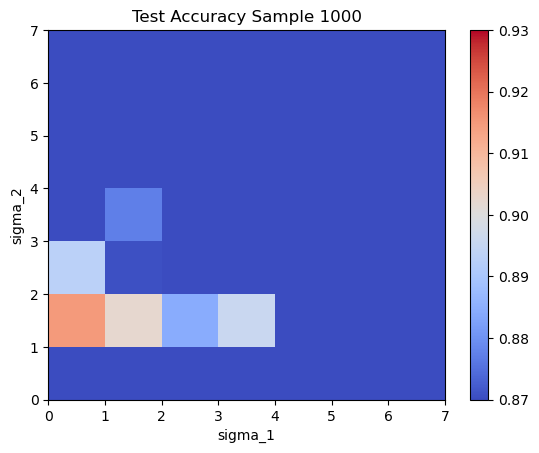

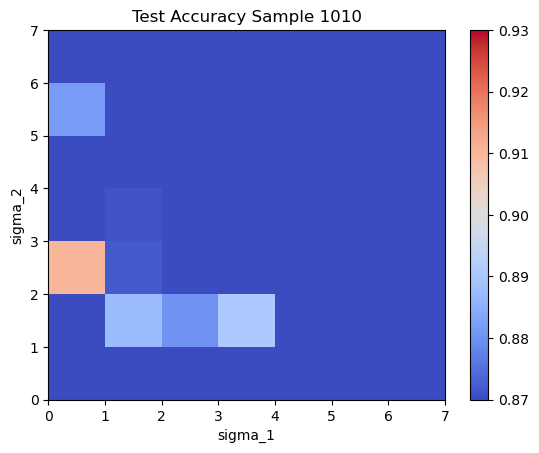

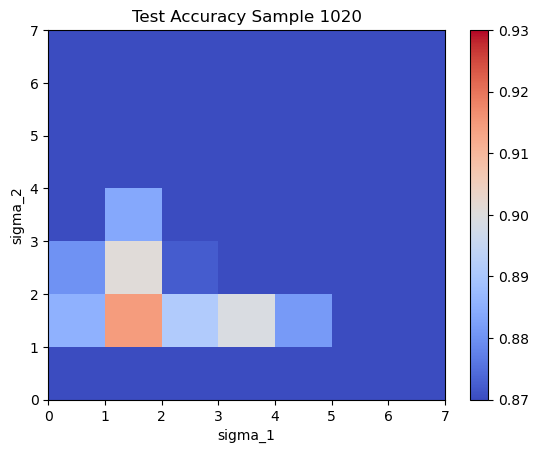

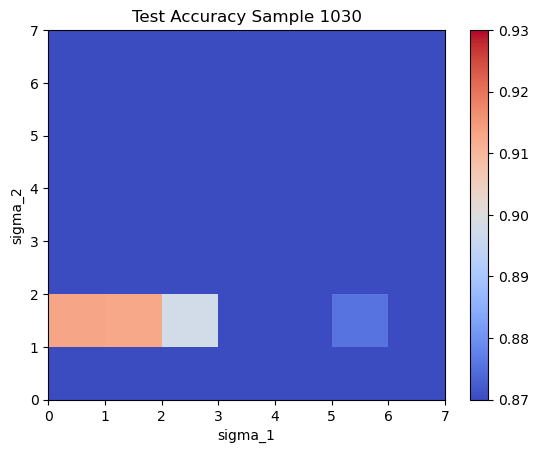

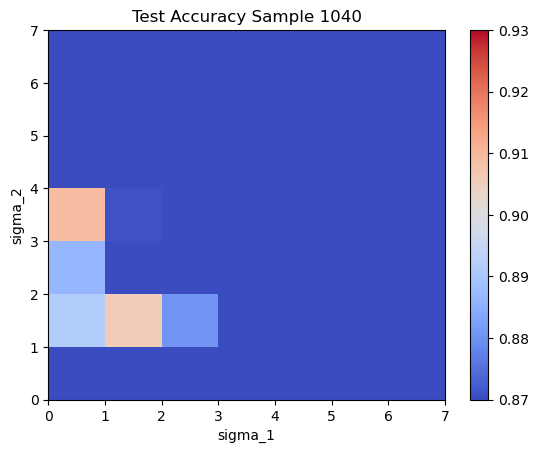

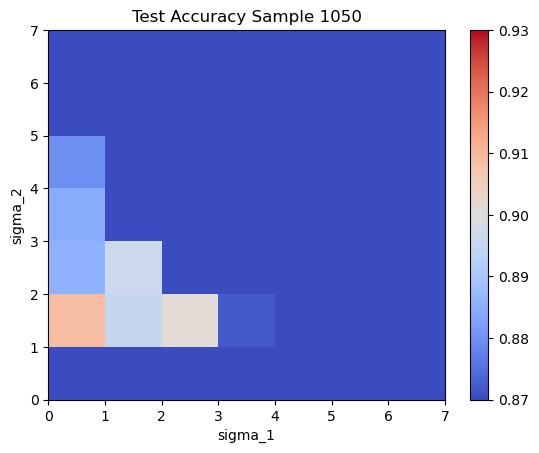

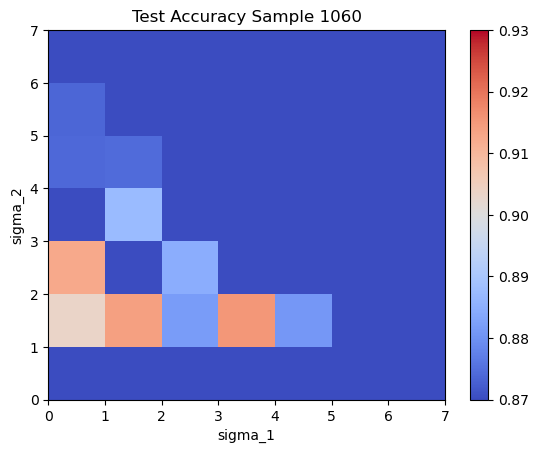

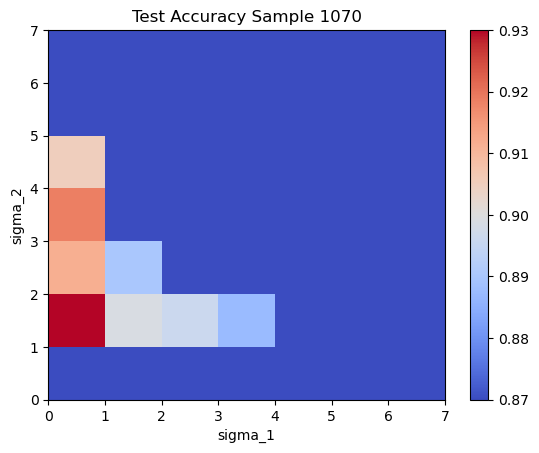

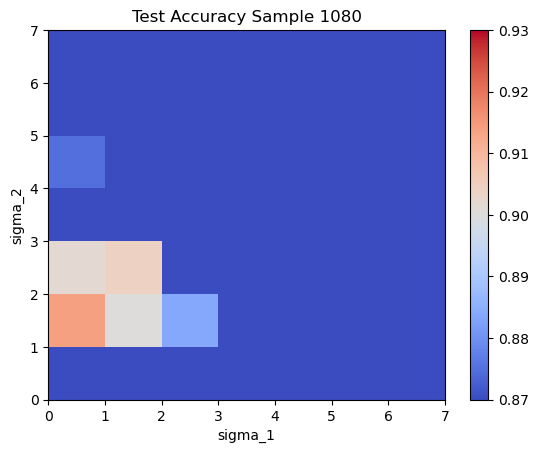

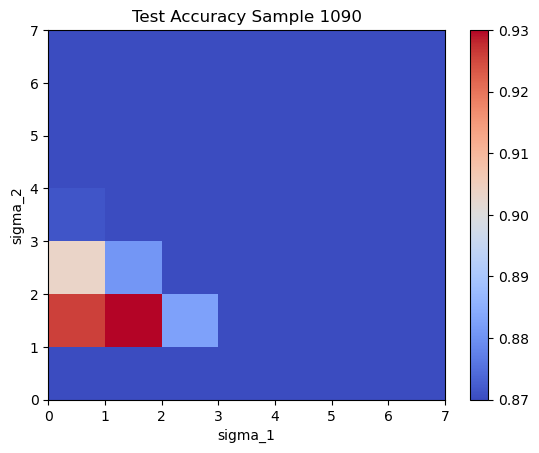

In [51]:
for (i,sample) in enumerate(sample_list):
    data = np.load(name_str.format(i))
    fig = plt.figure()
    ax = plt.axes()
    levels = np.linspace(0.87, 0.94, 10)
    b = ax.pcolormesh(data['test_accuracy_w1_w2'], cmap ='coolwarm', vmin=0.87, vmax=0.93)
    plt.colorbar(b)
    ax.set_xlabel('sigma_1')
    ax.set_ylabel('sigma_2')
    ax.set_title('Test Accuracy Sample {}'.format(sample))
    fig.savefig("test_accuracy_w1_w2_sample{}.png".format(sample))
    for (j,std_w1) in enumerate(axis_std_w1):
        for (k,std_w2) in enumerate(axis_std_w2):
            test_accuracy_10_samples[i][j][k]= data['test_accuracy_w1_w2'][j][k]


In [52]:
average_train_accuracy_grid_10_by_10_10_samples = np.mean(train_accuracy_10_samples, axis=0)
std_dev_train_accuracy_grid_10_by_10_10_samples = np.std(train_accuracy_10_samples, axis=0)

In [53]:
average_test_accuracy_grid_10_by_10_10_samples = np.mean(test_accuracy_10_samples, axis=0)
std_dev_test_accuracy_grid_10_by_10_10_samples = np.std(test_accuracy_10_samples, axis=0)

In [54]:
train_accuracy_10_samples.shape

(10, 7, 7)

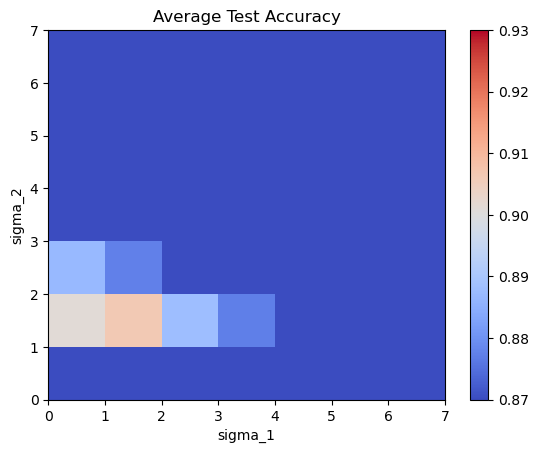

In [55]:
fig = plt.figure()
ax = plt.axes()
a = ax.pcolormesh(average_test_accuracy_grid_10_by_10_10_samples, cmap ='coolwarm', vmin= 0.87, vmax=0.93)
plt.colorbar(a)
ax.set_xlabel('sigma_1')
ax.set_ylabel('sigma_2')
ax.set_title('Average Test Accuracy')


fig.savefig("average_test_accuracy_grid_100.png".format(sample))

In [57]:
average_test_accuracy_grid_10_by_10_10_samples >= 0.999*np.max(average_test_accuracy_grid_10_by_10_10_samples)

array([[False, False, False, False, False, False, False],
       [False,  True, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False]])

In [58]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_train_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_train_accuracy_grid_10_by_10_10_samples)
best_w1_w2 = np.unravel_index(index_max_accuracy, average_train_accuracy_grid_10_by_10_10_samples.shape)

In [59]:
best_w1_w2

(0, 0)

In [60]:
# Find the best w1, w2 given the average accuracy of the grid

max_accuracy = np.max(average_test_accuracy_grid_10_by_10_10_samples)
index_max_accuracy = np.argmax(average_test_accuracy_grid_10_by_10_10_samples)
test_best_w1_w2 = np.unravel_index(index_max_accuracy, average_test_accuracy_grid_10_by_10_10_samples.shape)

In [61]:
test_best_w1_w2

(1, 1)

In [62]:
test_best_w1_best_w2 = (np.array(test_best_w1_w2)+np.array([0.5,0.5]))*0.06+0.001

In [63]:
test_best_w1_best_w2

array([0.091, 0.091])

In [64]:
data = {}
data['frequency'] = 65
data['N'] = 100
data['accuracy'] = max_accuracy
data['w1'] = test_best_w1_best_w2[0]/0.3445
data['error_bar_w1'] = 0.03/0.3445
data['w2'] = test_best_w1_best_w2[1]/0.3445
data['error_bar_w2'] = 0.03/0.3445
np.savez("test_accuracy_100",**data)